In [1]:
# Mix Matrix plot

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import glob
import os 
from configparser import ConfigParser

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def getconfig():
    '''
    Get the configuration file config.ini from above directories.
    Return: "path/config.ini" as string. 
    '''
    path = os.getcwd()
    pathSplit = path.split("/")

    for k in range(len(pathSplit)):
        path = "/".join(pathSplit[0:len(pathSplit)-k])
        configPath = glob.glob(path+"/*.ini")
        if len(configPath) !=0:
            break
            
    return configPath[0]

In [4]:
# Get parameters from config.ini 
ini = getconfig()
cfg = ConfigParser(inline_comment_prefixes="#")
cfg.read(ini)
config = dict(cfg.items('PARAMETERS'))

In [11]:
def plot(path='', ells = [0,60,300], hlines=[0.01], save=False):
    """
    Ploting Mix Matrix.
    path = .PATH/mixMatrix.dat
    ells = list of ell's to fix and plot.
    """
    data = np.loadtxt(path)

    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["legend.fontsize"] = 20

    plt.figure(figsize=(20,10))
    plt.title('Mix Matrix',size=30)

#     plt.hlines(0.105,min(ells),max(ells),linestyles='dotted', label=str(r'$R_{\ell \ell^\prime}$= 0.105'),color='r')
#     plt.hlines(0.0105,min(ells),max(ells),linestyles='dotted', label=str(r'$R_{\ell \ell^\prime}$= 0.0105'))

    for k in range(len(hlines)):
        plt.hlines(hlines[k], min(ells),max(ells),linestyles='dotted', label=str(r'$R_{\ell \ell^\prime}$='+str(hlines[k])))
        
    for k in range(len(ells)):
        dataEllFixo = data[np.where(data[:,0]==ells[k])]

        plt.plot(dataEllFixo[:,1],dataEllFixo[:,2], label=str(r'$\ell^\prime$'+str(ells[k])))
    
    
    plt.xlim(min(ells),max(ells))

    plt.xlabel(r'$\ell^\prime$',size=35)
    plt.ylabel(r'$R_{\ell \ell^\prime}$',size=35)

    plt.legend()
    
    # Save figure
    if save:
        os.system("mkdir -p "+'./output')
        savePath = './output/mixMatrix.png'
        plt.savefig(savePath, format='png')
        
    plt.show()
    plt.close()
    
    # Printing Delta L based on fist hline value:
    dataEllFixo = data[np.where(data[:,0]==30)]
    dataEllFixo = dataEllFixo[np.where(dataEllFixo[:,2]>=hlines[0])]
    print("Delta ell' =",len(dataEllFixo))

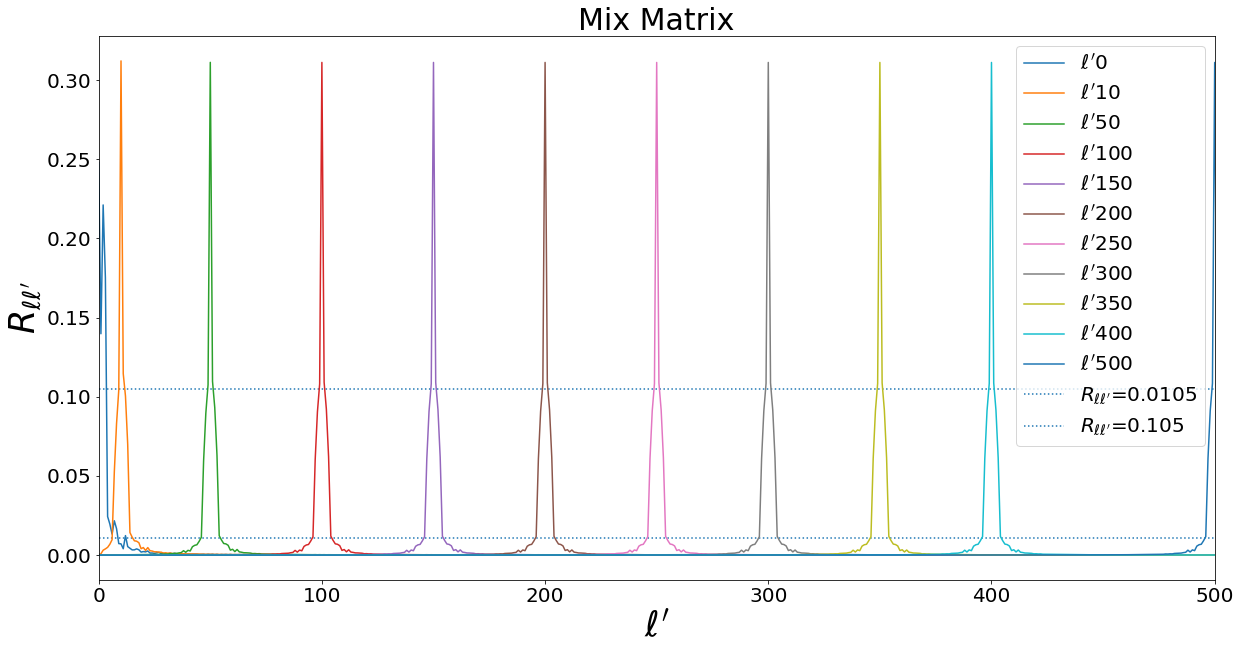

Delta ell' = 9


In [12]:
if __name__ == "__main__":
    pathMixMatrix = config['basedir']+"/data/output/mixMatrix.dat"
    ells = [0,10,50,100,150,200,250,300,350,400,500]
    plot(pathMixMatrix, ells, hlines=[0.0105, 0.105],save=False)

Sl = Sum Rll'.Cl 
(eq 37) Cosmological Measurements from angular power spectra

Intepretação: 

A matriz mistura é dependente da mascara e do IlmJlm.
Neste caso, o grafico 'afinado' indica uma matrix mistura 'muito diagonal'. 
Em outras palavras, a correlação entre os l's é diminuida conforme a largura das bandas plotadas é diminuida. Exemplo, se não houver correlação entre os l's proximos, então não haveria largura na plotagem no eixo ell'.

Desse estudo tiramos a 'binagem', analisando qual é a interferencia dos l's das redondezas.

In [14]:
# import healpy as hp

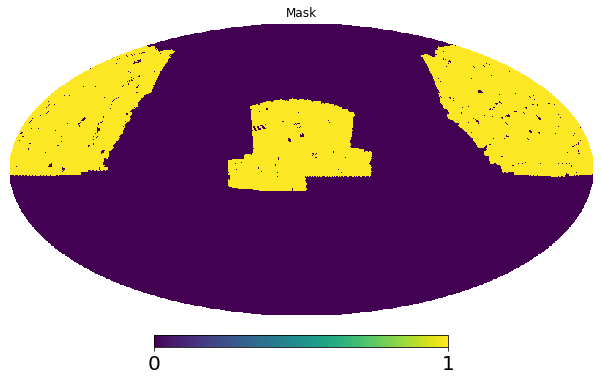

In [22]:
# path = config['footprintmask']
# mapa = hp.read_map(path)
# hp.mollview(mapa,title='Mask')